In [179]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
import sys
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv("iris.data", header=None)
data.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
x1 = data[0]/data[1]
x2 = data[2]/data[3]
le = preprocessing.LabelEncoder()
le.fit(data[4])
cl = le.transform(data[4])

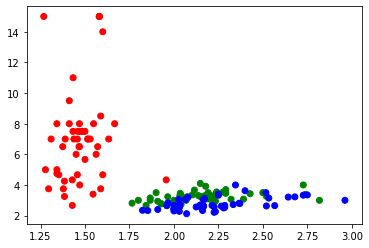

In [5]:
colors = ['red','green','blue']
plt.scatter(x1, x2,c=cl, cmap=matplotlib.colors.ListedColormap(colors))

In [191]:
def k_init(X, k):
    """ k-means++: initialization algorithm

    Parameters
    ----------
    X: array, shape(n ,d)
        Input array of n samples and d features

    k: int
        The number of clusters

    Returns
    -------
    init_centers: array (k, d)
        The initialize centers for kmeans++
    """

    C = np.zeros((k, X.shape[1]))
    np.random.seed(23)
    ix = np.random.choice(X.shape[0], 1)
    C[0] = X[ix, :]
    D = np.sum(np.square(X - C[0]), axis=1)
    for ki in range(1, k):
        ix = np.argmax(D)
        C[ki] = X[ix, :]
        D = np.minimum(D, np.sum(np.square(X - C[ki]), axis=1))
    return C


def k_means_pp(X, k, max_iter):
    """ k-means++ clustering algorithm

    step 1: call k_init() to initialize the centers
    step 2: iteratively refine the assignments

    Parameters
    ----------
    X: array, shape(n ,d)
        Input array of n samples and d features

    k: int
        The number of clusters

    max_iter: int
        Maximum number of iteration

    Returns
    -------
    final_centers: array, shape (k, d)
        The final cluster centers
    """
    C = k_init(X, k)

    for i in range(max_iter):
        print("It: ", i, "Centers :", C)
        data_map = assign_data2clusters(X, C)
        for ki in range(k):
            # I multiply the data map column of the given center to get the points in the cluster and remove 0 rows
            cluster_points = (X.T * data_map[:, ki]).T
            cluster_points = cluster_points[~(cluster_points == 0).all(1)]
            C[ki] = np.mean(cluster_points, axis=0)
    return C


def map_cluster(x):
    return [1 if c == np.min(x) else 0 for c in x]


def assign_data2clusters(X, C):
    """ Assignments of data to the clusters
    Parameters
    ----------
    X: array, shape(n ,d)
        Input array of n samples and d features

    C: array, shape(k ,d)
        The final cluster centers

    Returns
    -------
    data_map: array, shape(n, k)
        The binary matrix A which shows the assignments of data points (X) to
        the input centers (C).
    """
    k = C.shape[0]
    D = np.zeros((X.shape[0], k))

    for ki in range(k):
        D[:, ki] = np.sum(np.square(X - C[ki]), axis=1)
    #print("Distance ", D)
    data_map = np.apply_along_axis(map_cluster, axis=1, arr=D)
    return data_map


def silhouette_score(xi, ci, k, C_points):
    """ Compute the silhouette score for xi
    ----------
    xi: array, shape(d,)
        Input array d features

    ci: int
        Cluster index of xi

    k: int
        Number of clusters


    C_points: dictionary
        The points in each cluster

    Returns
    -------
    accuracy: float
        The silhouette_score for the given assigments
    """
    if k == 1 :
        return  0
    else:
        bi = sys.maxsize
        ai = sys.maxsize

        for ki in range(k):
            if ki == ci:
                ai = np.mean(np.sum(np.square(C_points[ki] - xi), axis=1))

            else:
                bi = min(bi, np.mean(np.sum(np.square(C_points[ki] - xi), axis=1)))

        si = (bi - ai) / max(bi, ai)
        return si

In [196]:
X = np.column_stack((x1, x2))
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
#X = np.column_stack(([1,2,5,4,6,7,5,4,3], [1,3,1,2,1,7,1,6,1]))
#print(X)
k= 7
C= k_means_pp(X, k, 5)
print ("Centers :", C)



It:  0 Centers : [[ 0.67212026 -0.44639443]
 [-1.72851127  4.02354227]
 [-1.62475021  0.99628355]
 [ 2.53266215 -0.51734581]
 [-1.32515841 -0.64348159]
 [-1.31317474  2.50991291]
 [-0.33121856 -0.7641332 ]]
It:  1 Centers : [[ 0.65715219 -0.48437676]
 [-1.08992392  3.9478608 ]
 [-1.21826273  0.9984583 ]
 [ 2.01486054 -0.39906053]
 [-1.30865641 -0.1418493 ]
 [-1.34031423  2.2261074 ]
 [-0.07161464 -0.61756135]]
It:  2 Centers : [[ 0.67156853 -0.48473505]
 [-1.08992392  3.9478608 ]
 [-1.18823041  1.05467974]
 [ 1.76725715 -0.43101558]
 [-1.35066209 -0.09100687]
 [-1.34031423  2.2261074 ]
 [ 0.02312105 -0.57320937]]
It:  3 Centers : [[ 0.6862142  -0.48669075]
 [-1.08992392  3.9478608 ]
 [-1.18823041  1.05467974]
 [ 1.76725715 -0.43101558]
 [-1.35066209 -0.09100687]
 [-1.34031423  2.2261074 ]
 [ 0.03838083 -0.56578414]]
It:  4 Centers : [[ 0.6862142  -0.48669075]
 [-1.08992392  3.9478608 ]
 [-1.18823041  1.05467974]
 [ 1.76725715 -0.43101558]
 [-1.35066209 -0.09100687]
 [-1.34031423  2.226

In [197]:
data_map = assign_data2clusters(X, C)
C_points = {}
for ki in range(k):
    #I multiply the data map column of the given center to get the points in the cluster and remove 0 rows
    cluster_points  = (X.T * data_map[:,ki]).T
    cluster_points = cluster_points[~(cluster_points==0).all(1)]
    C_points[ki] = cluster_points

In [150]:
print(C)
compute_objective(X,C)


[[ 2.09289505  3.1673129 ]
 [ 1.52204563 14.8       ]
 [ 1.47881418  7.36781609]]


array([0.93323873, 0.9931902 , 0.84769046])

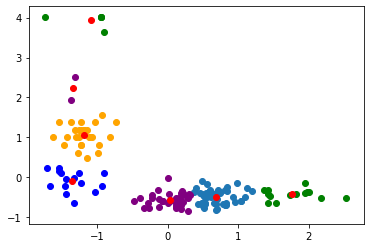

In [204]:
plt.scatter(C_points[0][:,0], C_points[0][:,1])
plt.scatter(C_points[1][:,0], C_points[1][:,1], c='green')
plt.scatter(C_points[2][:,0], C_points[2][:,1], c='orange')
plt.scatter(C_points[3][:,0], C_points[3][:,1], c='green')
plt.scatter(C_points[4][:,0], C_points[4][:,1], c='blue')
plt.scatter(C_points[5][:,0], C_points[5][:,1], c='purple')
plt.scatter(C_points[6][:,0], C_points[6][:,1], c='purple')
plt.scatter(C[:,0], C[:,1], c='red')